<hr/>

# Introduction to Data Science
**Jinchao Feng and Christian Kuemmerle** - introdsfall2021@jh.edu <br/>

- Recap: Logistic Regression
- Support Vector Machines

<hr/>

### Classification Methods

- Logistic Regresion
- **Support Vector Machines**

## Logistic Regression: Review

### Binary Logistic Regression

Suppose $\mathbf{x}_1,\mathbf{x}_2,\ldots,\mathbf{x}_n$ are $d$-dimensional feature vectors, training labels $y_1,\ldots,y_n$ are in $\{c_1,c_2\} = \{0,1\}$.

$y_i\in\{c_1,c_2\}$ are classes.

Assumption of (binary) logistic regression: 
  - There are parameters $\beta_1 \in \mathbb{R}^d$, $\beta_0 \in \mathbb{R}$ so that the *``Log odds''* of the classes $c_1$ and $c_2$ are described by linear function, i.e.,
>  $\log \dfrac{p(c_1 \lvert \mathbf{x})}{p(c_2 \lvert \mathbf{x})} = \beta_1^T \mathbf{x} + \beta_0.$
  - Maximum Likelihood Estimation leads to *minimization* of **cross entropy loss**
  
> $$  \min_{\beta_1,\beta_0} \sum_{i=1}^n L_{\log}\left(y_i, \sigma( \beta_1^T \mathbf{x}_i + \beta_0)\right) $$

where $L_{\log}\left(y, \mathbf{z} \right) = - (y_i \log(z_i) + (1-y_i) \log(1-z_i))$ and $\sigma: \mathbb{R} \to \mathbb{R}$ is **sigmoid** funciton,
> $ \displaystyle \sigma(t) = \frac{1}{1+e^{-t}} = \frac{e^t}{1+e^t}.$

We can check: $1- \sigma(t) = \sigma(-t)$.

Defining $\tilde{y}_i = 1$ if $y_i = 1$ and $\tilde{y}_i = -1$ if $y_i = 0$, we compute
>  $$ \begin{split}  \sum_{i=1}^n L_{\log}\left(y_i, \sigma( \beta_1^T \mathbf{x}_i + \beta_0)\right) &= - \sum_{i=1}^n \left( y_i \log(\sigma(\beta_1^T \mathbf{x}_i + \beta_0)) + (1-y_i) \log(1 - \sigma(\beta_1^T \mathbf{x}_i + \beta_0)) \right)\\
&= - \sum_{i=1}^n \left( y_i \log(\sigma(\beta_1^T \mathbf{x}_i + \beta_0)) + (1-y_i) \log(\sigma(- (\beta_1^T \mathbf{x}_i + \beta_0)) \right) \\ 
&= - \sum_{i=1}^n \log(\sigma(\tilde{y}_i(\beta_1^T \mathbf{x}_i + \beta_0)))  \\
&= \sum_{i=1}^n \log(\exp(-\tilde{y}_i(\beta_1^T \mathbf{x}_i + \beta_0))+1)
\end{split} $$

In [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression), we introduce $\ell_2$-regularization term $\min_{\beta_1,\beta_0} \frac{1}{2}\|\beta_1\|_2^2$ and parameter $C>0$ such that

> $$  \min_{\beta_1,\beta_0} \left\{\frac{1}{2}\|\beta_1\|_2^2 + C \sum_{i=1}^n L_{\log}\left(y_i, \sigma( \beta_1^T \mathbf{x}_i + \beta_0)\right) \right\} $$ 

see [here](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression).

Alternatively: $\ell_1$-regularization for sparse features/interpretability, as in Lasso regression.

### Multiclass Logistic Regression

If default in `sklearn.linear_model.LogisticRegression` is chosen (corresponds to parameter `multi_class = 'multinomial'`): <br>

As above, but now training labels $y_1,\ldots,y_n$ are in $\{c_1,c_2,\ldots,c_K\}$ with $K >2$. Similar as above, but 
   - encode $y_i \mapsto \mathbf{y}_i \in \{0,1\}^K$ where $\mathbf{y}_{ij}$ is $1$ if and only if $y_i$ is in class $j$ ("One-Hot-Encoder"),
   - use $\texttt{softmax}: \mathbb{R}^d \to \mathbb{R}^d$, $\texttt{softmax}(\mathbf{z}) = \begin{pmatrix}\frac{\exp(z_1)}{\sum_{j=1}^K \exp(z_j)}, & \ldots, &  \frac{\exp(z_K)}{\sum_{j=1}^K \exp(z_i)}\end{pmatrix}$ instead of sigmoid function $\sigma$,
   - and where **cross entropy loss** is $L_{\log}\left(\mathbf{y}, \mathbf{z}\right) = \sum_{j=1}^K \mathbf{y}_i \log(\mathbf{z}_i)$.


<h1><font color="darkblue">Classification using Support Vector Machines (SVM)</font></h1>

#### Background

  - Popularized in 1990s [V. Vapnik]
  - Successful on benchmark dataset [ImageNet](https://en.wikipedia.org/wiki/ImageNet), until 2012 state-of-the-art
  
<img src='https://production-media.paperswithcode.com/datasets/ImageNet-0000000008-f2e87edd_Y0fT5zg.jpg' width=400 align=left> 
  
<img src='http://www.videantis.com/wp-content/uploads/2018/07/LSVRC-winners-over-time.png' width=400 align=center> 

  - SVM are *discriminative* classifers: Does not use probabilistic model, uses geometric ideas

## Maximum Margin Classifier ("Hard Margin")

(whiteboard)

We want to find linear seperator function $f(x) = w^T x + b$ such that *hyperplane*
> $H = \{x: f(x)= 0\}$ 

"separates" points associated to different classes/labels.

If labels $y_i \in \{-1,+1\}$, we want:

> $ f(x_i) = w^T x_i + b \geq 0 \quad$ if $y_i = +1$, and <br>
> $ f(x_i) = w^T x_i + b < 0 \quad$ if $y_i = -1$,

or equivalently

>  $y_i ( w^T x_i + b ) \geq 0$

for all pairs $(x_i,y_i)$ with $i=1,\ldots,n$.

#### Maximize the margin

**Goal:** Find linear seperator with *largest margin* $r$.
![Margins in SVM](files/svm.png)

> $$ \begin{split} \max_{w,b,r}\quad &r \quad  \\
\text{ subject to }\quad& y_i( w^T x_i + b ) \geq r \quad\text{ for all }\;i=1,\ldots,n,\;\; \|w\|_2= 1 \end{split}$$.

A computation shows that this is equivalent to

> $$ \begin{split} \min_{w',b}\quad &\frac{1}{2} \|w'\|_2^2 \quad  \\
    \text{ subject to }\quad& y_i( w'^T x_i + b ) \geq 1 \quad\text{ for all }\;i=1,\ldots,n \end{split}$$.

The margin of a hyperplane with respect to training data is the **minimal distance** between a point in the training data and the hyperplane.
 
In this sense, if a hyperplane has a large margin, then it still could separate the training data even if we slightly perturb each data point.

The margin $r$ can be then computed by the width $2r$, which is the length of the projection of the vector $(\mathbf x_2 - \mathbf x_1)$ to the vector $\mathbf w$ (or the unit vector $\mathbf w / \|\mathbf w\|$).

<img src='files/svm2.png' width=400 align=left> 
<br>

The problem above is a convex optimization problem, and it can be solved efficiently by standard tools in numerical optimization.

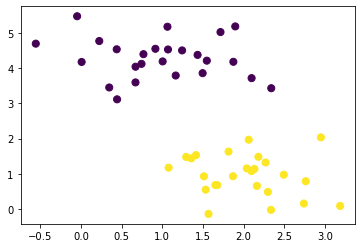

In [1]:
# plot different seperating hyperplanes for simple two-class dataset
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);
plt.show()

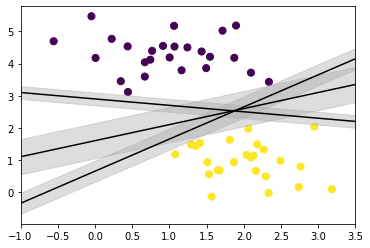

In [2]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);
plt.show()

We are now ready to use the implementation of scikit-learn, [sklearn.svm.LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html?highlight=svc#sklearn.svm.LinearSVC) to fit a maximum margin model.

In [4]:
# Fitting a support vector machine
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10) # We choose C, which is a regularization parameter, very large. More details below
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

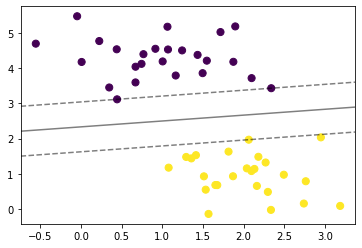

In [5]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(model);

Note: Only **"support vectors"** play a role in definition the decision boundary / the classifier.

Unhomework: Find the support vectors for this dataset and classifier.

In [6]:
model.score(X, y, sample_weight=None)

1.0

We have obtained a perfectly consistent classification accuarcy.

For given data $\{(x_i, y_i)\}_{i=1}^n$ where $x_i$ is $d$-dimensional feature vector and $y_i\in\{-1, 1\}$ the label, we can consider three possible cases:

1. Classes are perfectly linearly separable in feature space.
2. Classes are not perfectly linearly separable, but a linear classifier still seems appropriate.
3. Not perfectly linearly separable, and a linear classifier does not seem appropriate at all.

In [9]:
from sklearn import datasets
# Generate 100 not perfectly separable points
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=3, center_box = (-6.0,6.0))

Model accuracy using hard margin SVM: 0.96


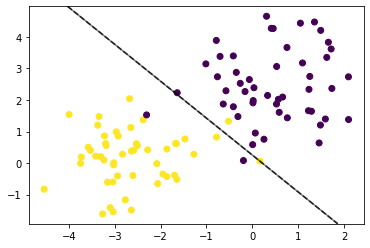

In [11]:
model2 = SVC(kernel='linear', C=1E10) # We choose C, which is a regularization parameter, very large. More details below
model2.fit(X, y)
plt.scatter(X[:,0], X[:,1], c=y);
plot_svc_decision_function(model2);
print("Model accuracy using hard margin SVM:",model2.score(X,y))

In this example, classes are *not perfectly sepearable*! 

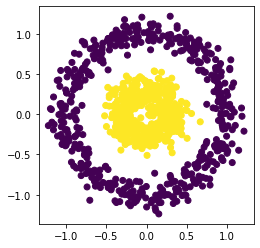

In [12]:
# Generate concentric classes (no linear classifier is effective)
x, y = datasets.make_circles(n_samples=1000, factor=0.3, noise=0.1, random_state=2018)
plt.subplot(111, aspect='equal'); 
plt.scatter(x[:,0], x[:,1], c=y);

In [13]:
model2.dual_coef_

array([[-3.39682706e+09, -1.00000000e+10, -1.00000000e+10,
         6.24326384e+09,  1.69468050e+09,  5.45888272e+09,
         1.00000000e+10]])

In this case, it is even clearer that a linear sepearation by a hyperplane cannot be achieved. Or, can it?

The SVM linear classifier is a *hyperplane* defined by $\{x:f(x)= w^T x +b \}$ with $\|w\|_2=1$.

Given the hyperplane parameters $w$ and $b$, we can define its classification function such that $G(x) = \text{sign}(w^T x +b)$.

Note $f(x_i) = w^T x_i +b$ gives the signed distance from the point $x_i$ to the hyperplane. 

### Soft Margin Support Vector Classifier
We recall that if the binary labels are such that $y_i \in \{-1,+1\}$ for all $i$,

> $$ \begin{split} \min_{w,b}\quad &\frac{1}{2} \|w\|_2^2 \quad  \\
    \text{ subject to }\quad& y_i( w^T x_i + b ) \geq 1 \quad\text{ for all }\;i=1,\ldots,n \end{split}$$.

was the optimization problem whose solution defines the hard margin support vectors / the respective hyperplane.

**Goal:** Relax the optimization problem to allow for some points to be on wrong side of the margin.

Introduce *slack variables* $\xi = (\xi_1, \dots, \xi_n)$, and consider the optimization problem

> $$ \begin{split} \min_{w,b,\xi_1,\ldots,\xi_n}\quad &\frac{1}{2} \|w\|_2^2 + C \sum_{i=1}^n \xi_i \quad  \\
    \text{ subject to }\quad& y_i( w^T x_i + b ) \geq 1 -\xi_i \ \text{and } \xi_i \geq 0 \quad\text{ for all }\;i=1,\ldots,n \end{split}.$$


The $\xi_i$ measure the distance between $x_i$ and the correct margin. Note $\xi_i=0$ means $x_i$ correctly classified, and $\xi_i>1$ means $x_i$ misclassified.

**Note**: Regularization only on $w$, not on $b$.

We observe:
   - If $C$ large, almost no room for slack variables $\xi_i$ -> hard margin support vector classifier.
   - If $C$ is small, **many** data points are allowed to be on "wrong" side of hyperplane.

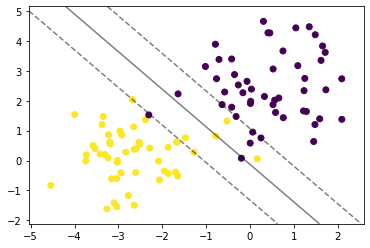

Model accuracy using soft margin SVM: 0.96 , if constant C= 1 is used


In [14]:
# Fit SVC for second example
x, y = datasets.make_blobs(n_samples=100, centers=2, random_state=3, center_box = (-6.0,6.0))
clf = SVC(kernel='linear', C=1)
clf.fit(x, y)

# Create grid to evaluate model
xx = np.linspace(x[:,0].min()-0.5, x[:,0].max()+0.5, 30)
yy = np.linspace(x[:,1].min()-0.5, x[:,1].max()+0.5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']);
plt.scatter(x[:,0], x[:,1], c=y);
plt.show()
print("Model accuracy using soft margin SVM:",clf.score(X,y),", if constant C=",clf.C,"is used")

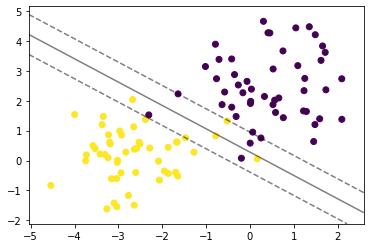

Model accuracy using soft margin SVM: 0.97 , if constant C= 10 is used


In [15]:
clf = SVC(kernel='linear', C=10)
clf.fit(x, y)
Z = clf.decision_function(xy).reshape(XX.shape)
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']);
plt.scatter(x[:,0], x[:,1], c=y);
plt.show()
print("Model accuracy using soft margin SVM:",clf.score(X,y),", if constant C=",clf.C,"is used")

Well-classified data do not affect the decision boundary or margin. \

**Support vectors** is the name of the data points that affect the decision boundary (i.e., data lying between/on margins).

In LDA, decision boundary computed from covariance of the sample points and class centroids.

### Support Vector Machines and Kernels

So far, support vector classifiers find linear boundaries in the feature space. Very non-linear boundaries will not work well with the above version of SVM, so we need another idea.

To address these cases, a more flexible approach enlarges the feature space, since linear boundaries in the larger space translate to nonlinear boundaries in the original space.

$\phi: \mathbb{R}^d \to \mathbb{R}^{d'}, \ d < d'$

Fit an support vector classifier using the input features $\phi(x_i) = (\phi_1(x_i), \dots, \phi_{d'}(x_i)), \ i = 1,\dots,n$ and produce (nonlinear) function 

> $\hat f(x) = w^T \phi(x) + b$.

Classifier is $\hat G(x) = \text{sign}(\hat f(x))$ as before.

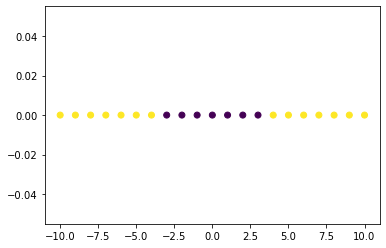

In [16]:
# Toy Example: not linearly separable in original space (dimension=1)
x = np.arange(-10, 11)
y = np.repeat(-1, x.size)
y[np.abs(x) > 3] = 1

plt.scatter(x, np.repeat(0, x.size), c=y);

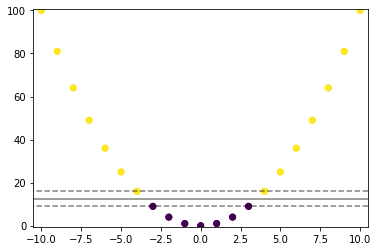

In [17]:
# Linearly separable in feature space (dimension=2)
x2 = x**2
X = np.c_[x,x2]
plt.scatter(x, x2, c=y);
clf = SVC(kernel='linear', C=10)
clf.fit(X, y)

# Create grid to evaluate model
xx = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 30)
yy = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']);
plt.scatter(X[:,0], X[:,1], c=y);

The *support vector machine* classifier extends this idea: $d'$ can get very large (or even infinite).

Need not worry about $\phi(\cdot)$ explicitly, instead define a *Kernel* $K(x,x') = \phi(x)^\top \phi(x')$. We can then compute the decision function from here.

Common choices of kernels include:
\begin{align}
&d^{\text{th}}-\text{degree polynomial}: &K(x,x') = (1+x^\top x')^d \\
&\text{Gaussian radial basis}: &\exp\{-\gamma\|x-x'\|^2\}
\end{align}

These kernels can be used by setting `kernel='poly'` and  `kernel='rbf'`, respectively.

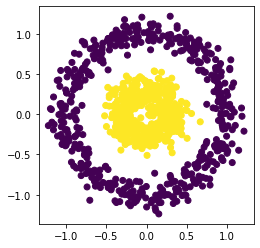

In [18]:
# Generate concentric classes (no linear classifier is effective)
x, y = datasets.make_circles(n_samples=1000, factor=0.3, noise=0.1, random_state=2018)
plt.subplot(111, aspect='equal'); 
plt.scatter(x[:,0], x[:,1], c=y);

In [19]:
from sklearn.model_selection import cross_val_score

# Linear kernel
clf = SVC(kernel='linear')

print('10-fold cv scores with Linear kernel: ', np.mean(cross_val_score(clf, x, y, cv=10)))

10-fold cv scores with Linear kernel:  0.6249999999999999


In [20]:
# Polynomial kernel
clf = SVC(kernel='poly')

print('10-fold cv scores with Polynomial kernel: ', np.mean(cross_val_score(clf, x, y, cv=10)))

10-fold cv scores with Polynomial kernel:  0.6039999999999999


In [21]:
# RBF kernel
clf = SVC(kernel='rbf',gamma='auto')

print('10-fold cv scores with RBF kernel: ', np.mean(cross_val_score(clf, x, y, cv=10)))

10-fold cv scores with RBF kernel:  1.0


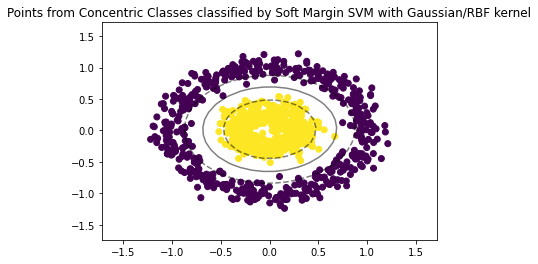

In [22]:
clf.fit(x,y)
xx = np.linspace(x[:,0].min()-0.5, x[:,0].max()+0.5, 30)
yy = np.linspace(x[:,1].min()-0.5, x[:,1].max()+0.5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
plt.scatter(x[:,0], x[:,1], c=y);
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']);
plt.title("Points from Concentric Classes classified by Soft Margin SVM with Gaussian/RBF kernel")
plt.show()